In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"F:\Study\ICT Academy Kerela\Case study 02\Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
#Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
print(scaled_data[:5])
print(scaled_data.shape)

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]
(440, 8)


In [6]:
# K-Means Clustering
def find_optimal_k(data):
    inertia = []
    silhouette_scores = []
    K = range(2, 10)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
        
    return K, inertia, silhouette_scores


In [7]:
# Find optimal K
K, inertia, silhouette_scores = find_optimal_k(scaled_data)

In [8]:
print(K)
print(inertia)
print(silhouette_scores)

range(2, 10)
[2599.38555935614, 2149.283956221759, 1851.7595764506573, 1548.8659343652666, 1314.8913838359533, 1173.9543541860526, 1050.9697424767132, 990.8674869040394]
[0.37323636511581165, 0.3567685389017652, 0.34782361136344925, 0.3451742496217193, 0.354872768644064, 0.3638318723917674, 0.36313723824119354, 0.3419028295881246]


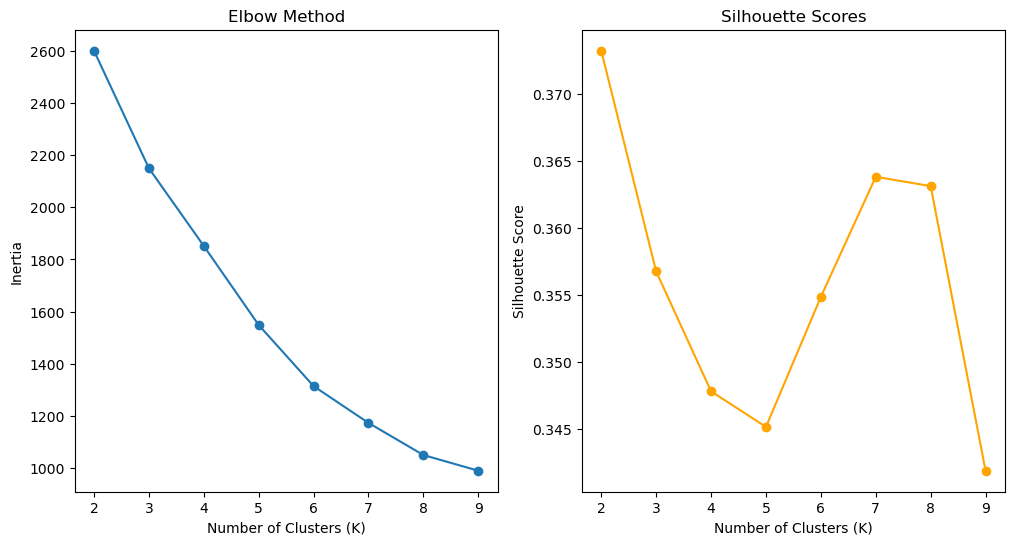

In [9]:
# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.show()

In [10]:
# Finalize K-Means with optimal clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [11]:
print(kmeans_labels[:10])

[0 0 0 1 0 0 0 0 1 0]


In [12]:
# 4. Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg.fit_predict(scaled_data)

In [13]:
# 5. DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust hyperparameters as needed
dbscan_labels = dbscan.fit_predict(scaled_data)

In [14]:
print(dbscan_labels[:10])

[ 0  0 -1  1  0  0  0  0  1  0]


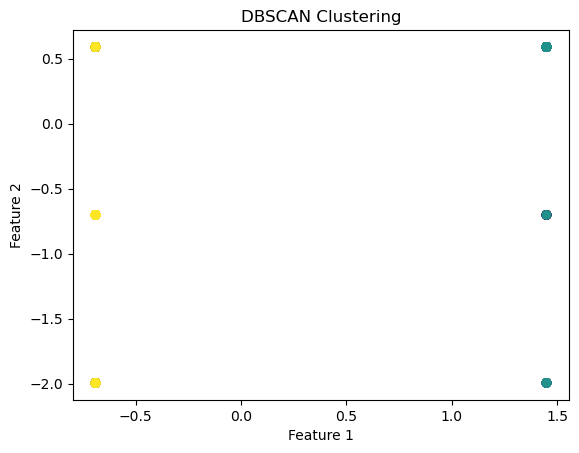

In [15]:
# Plot DBSCAN results
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [17]:
print(pca_data[:5])

[[ 0.84393893 -0.51535075]
 [ 1.06267645 -0.48460126]
 [ 1.26914052  0.68205455]
 [-1.05678239  0.6108215 ]
 [ 0.63403048  0.97419884]]


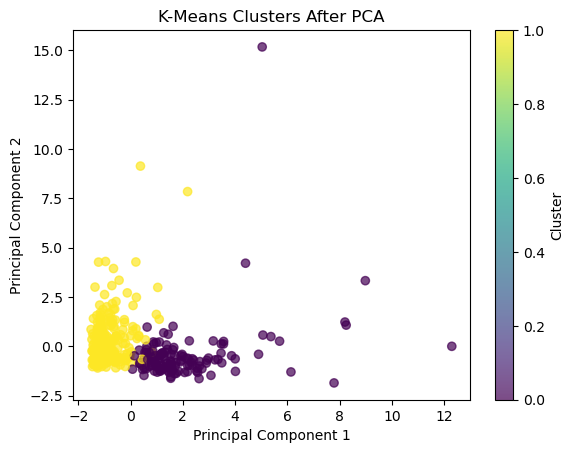

In [18]:
# Visualize K-Means clustering results after PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
# Summary of Clustering Results
df['KMeans_Cluster'] = kmeans_labels
df['Agglomerative_Cluster'] = agg_labels
df['DBSCAN_Cluster'] = dbscan_labels

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  KMeans_Cluster  Agglomerative_Cluster  DBSCAN_Cluster  
0        1338               0                      0               0  
1        1776               0                      0               0  
2        7844               0                      0              -1  
3        1788               1                      1               1  
4        5185               0                      0               0  
